**Preprocessing Data**

In [ ]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings; warnings.filterwarnings("ignore"); warnings.simplefilter('ignore')
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

In [ ]:
#read data
df = pd.read_csv('milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
df.shape

(1059, 8)

In [ ]:
#displays information from the dataframe
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
#checking if dataset containts null
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [ ]:
#separate feature data and target data
x = df.iloc[:,:-1]
y = df['Grade']

In [ ]:
x

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [ ]:
y

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object

In [ ]:
#converting string to numeric
df = df.replace({'Grade' : {'high' : 2, 'medium' : 1, 'low' : 0}})
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


**VISUALISASI DATA**

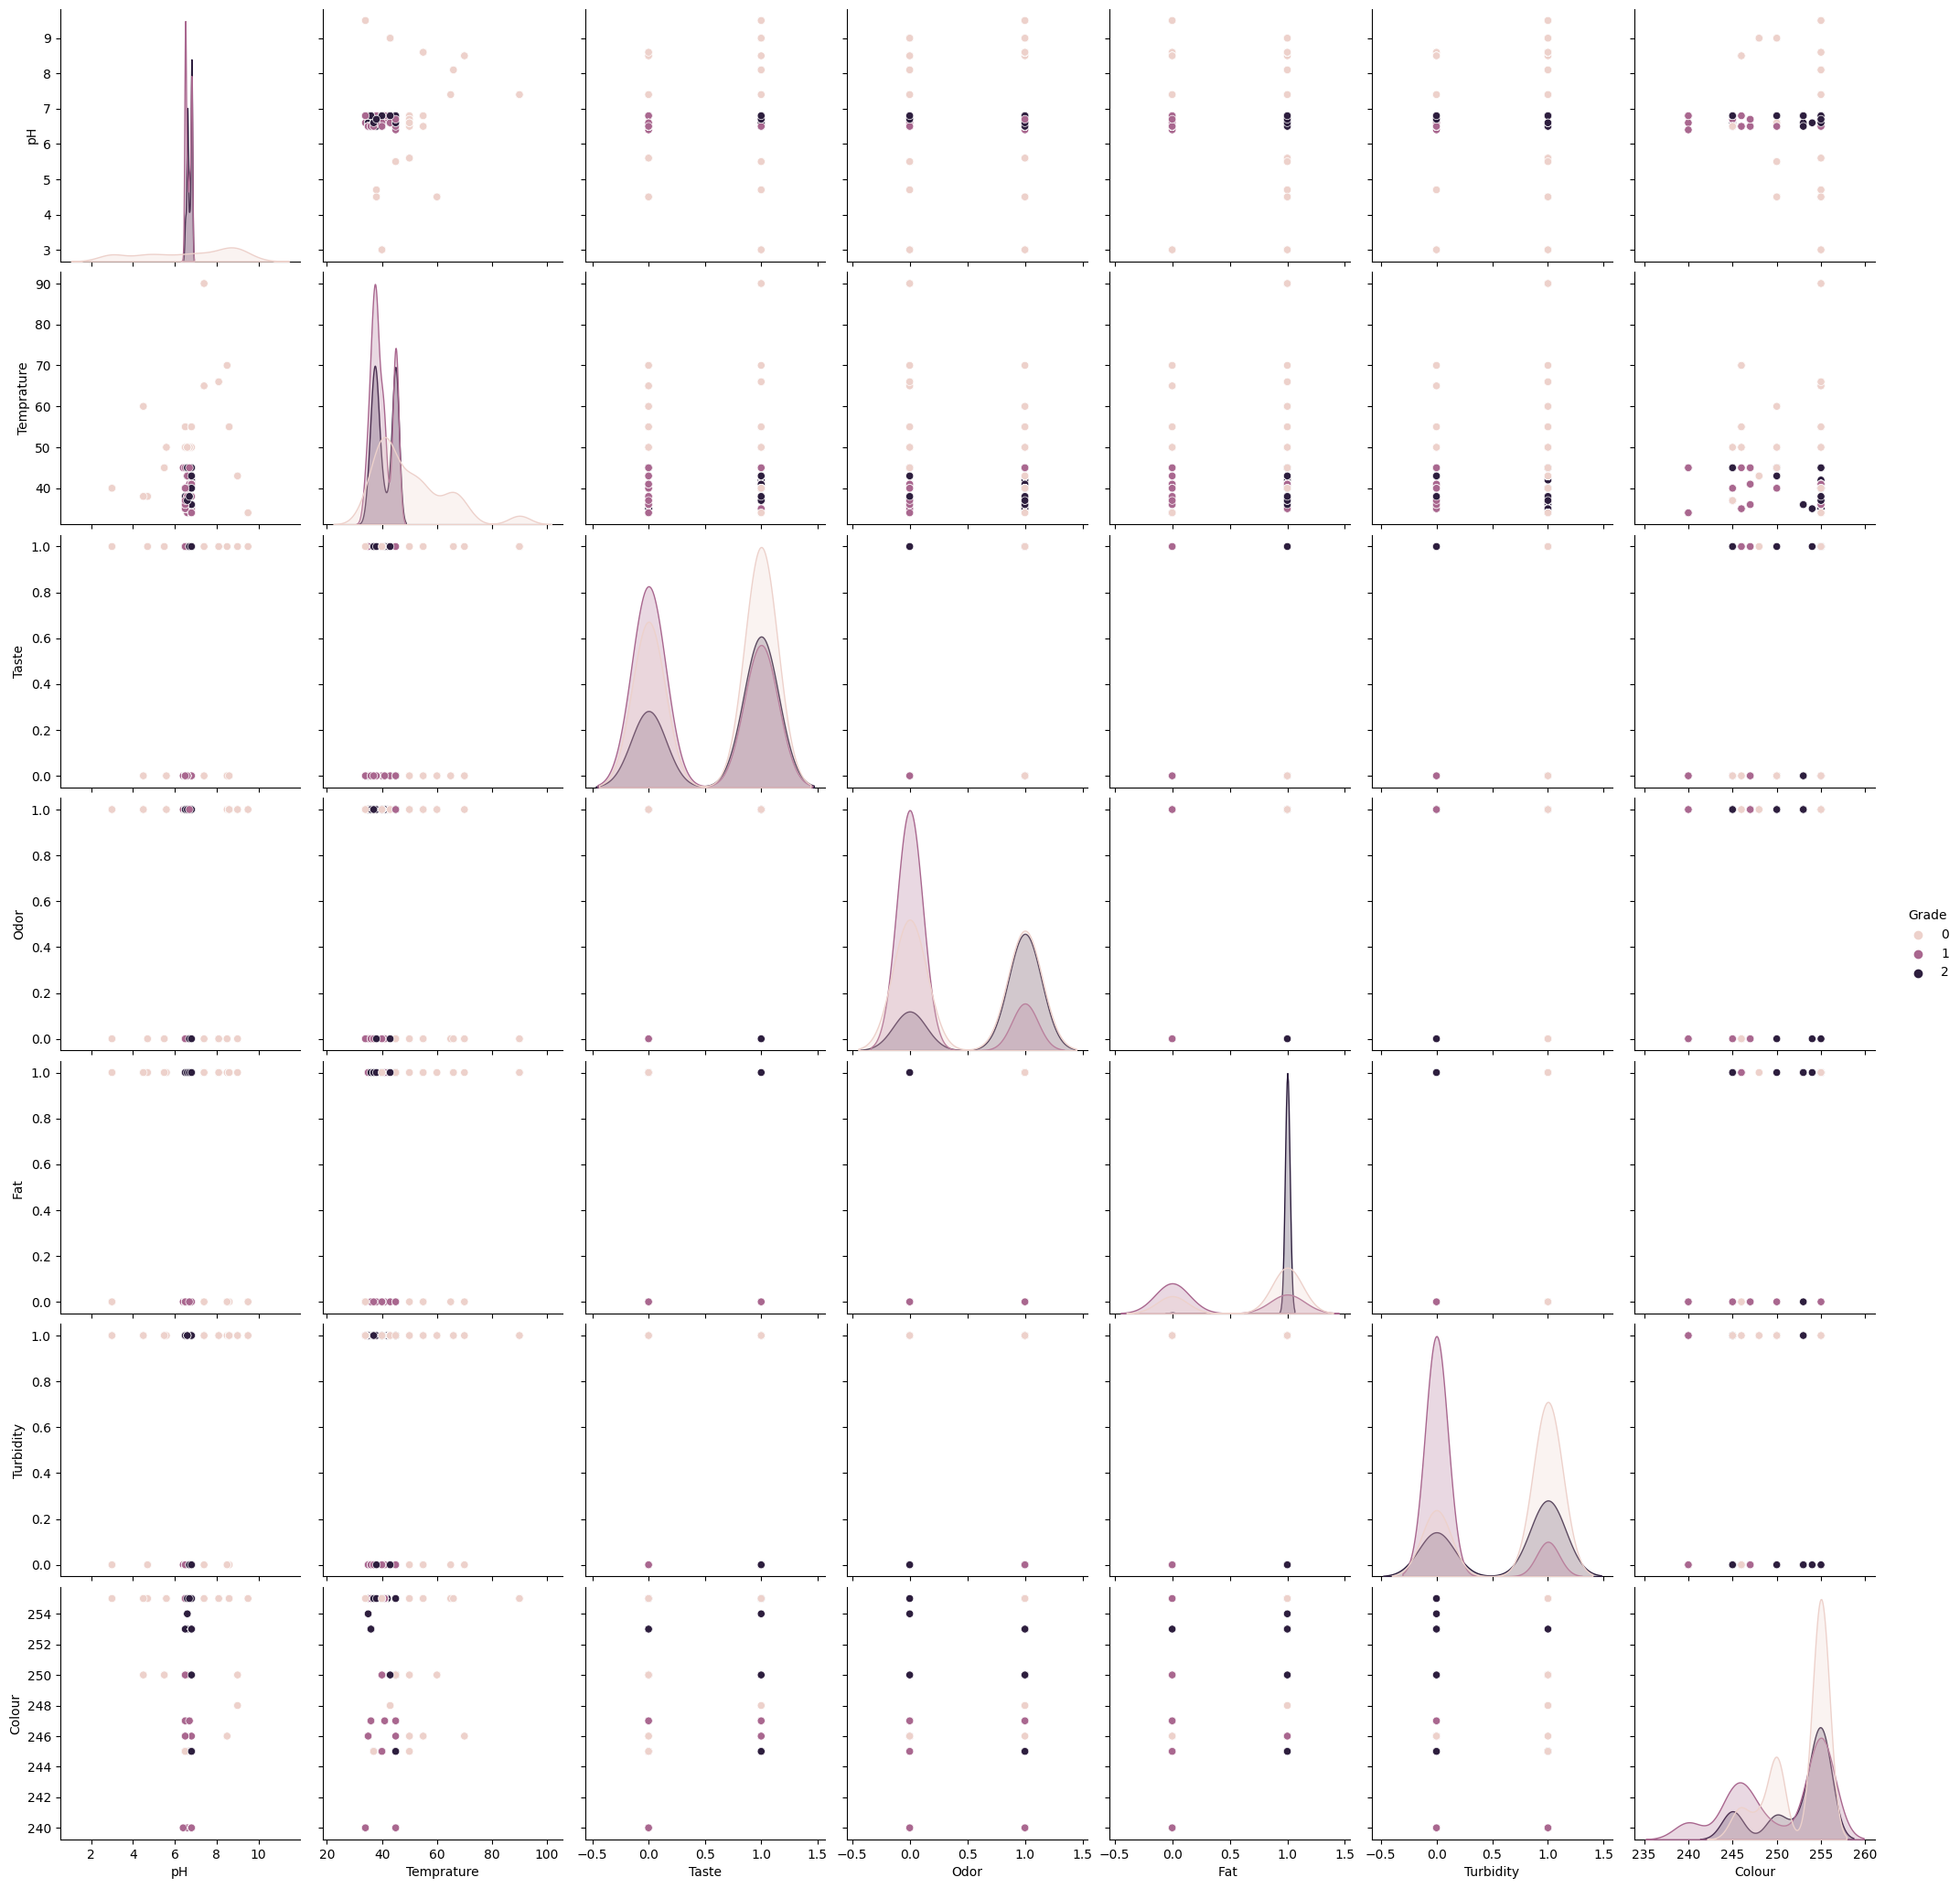

In [ ]:
#data visualization
sns.pairplot(df, hue='Grade', size=3);

**TRAINING DAN TESTING DATA**

In [ ]:
X = df.drop('Grade',axis=1).values
y = df[["Grade"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(X))

In [ ]:
X.head()

,0,1,2,3,4,5,6
0,-0.021531,-0.914107,0.910503,-0.872962,0.699608,-0.982217,0.501600
1,-0.021531,-0.815035,-1.098294,1.145525,-1.429372,1.018105,0.269333
2,1.336564,2.553438,0.910503,1.145525,0.699608,1.018105,-1.356536
3,2.051351,-1.013180,0.910503,1.145525,-1.429372,1.018105,0.733867
4,-0.021531,-0.715962,-1.098294,-0.872962,-1.429372,-0.982217,0.733867


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(741, 7)
(741, 1)
(318, 7)
(318, 1)


**PEMBUATAN MODEL KNN**

In [ ]:
#creating a classifier using KNN:
from sklearn.neighbors import KNeighborsClassifier

test_acc=[]
train_acc=[]

for i in range(1,15):
  #setting up a knn classifier
  knn = KNeighborsClassifier(i)
  #fitting the model
  knn.fit(X_train,y_train)
  #computing the accuracy for both the trainig and the test data
  train_acc.append(knn.score(X_train,y_train))
  test_acc.append(knn.score(X_test,y_test))

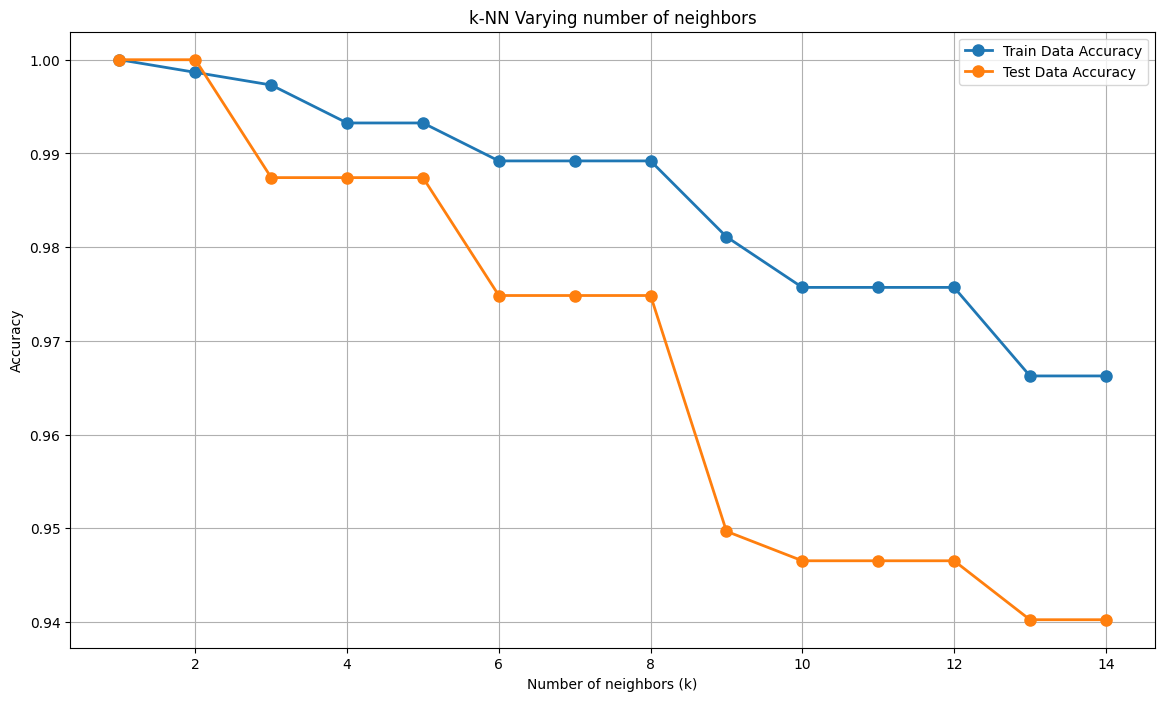

In [ ]:
#visualization of scores of the model
plt.figure(figsize=(14, 8))
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1, 15), train_acc, marker='o', linestyle='-', linewidth=2, markersize=8, label='Train Data Accuracy')
plt.plot(range(1, 15), test_acc, marker='o', linestyle='-', linewidth=2, markersize=8, label='Test Data Accuracy')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

*Mencari nilai k maksimum*

In [ ]:
max_acc = max(test_acc)
max_k = test_acc.index(max_acc) + 1

print("Maximum testing accuracy:", max_acc)
print("Value of k for maximum testing accuracy:", max_k)

Maximum testing accuracy: 1.0
Value of k for maximum testing accuracy: 1


In [ ]:
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

In [ ]:
knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9874213836477987

In [ ]:
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9874213836477987

In [ ]:
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9874213836477987

*Mengambil nilai k=5*

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.values.ravel())
pred = knn.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       127
           1       0.97      1.00      0.99       115
           2       0.99      1.00      0.99        76

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



**PEMBUATAN MODEL DECISION TREE**

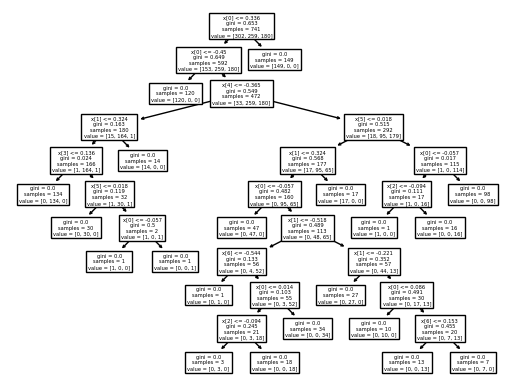

In [ ]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
tree.plot_tree(classifier)

y_pred = classifier.predict(X_test)

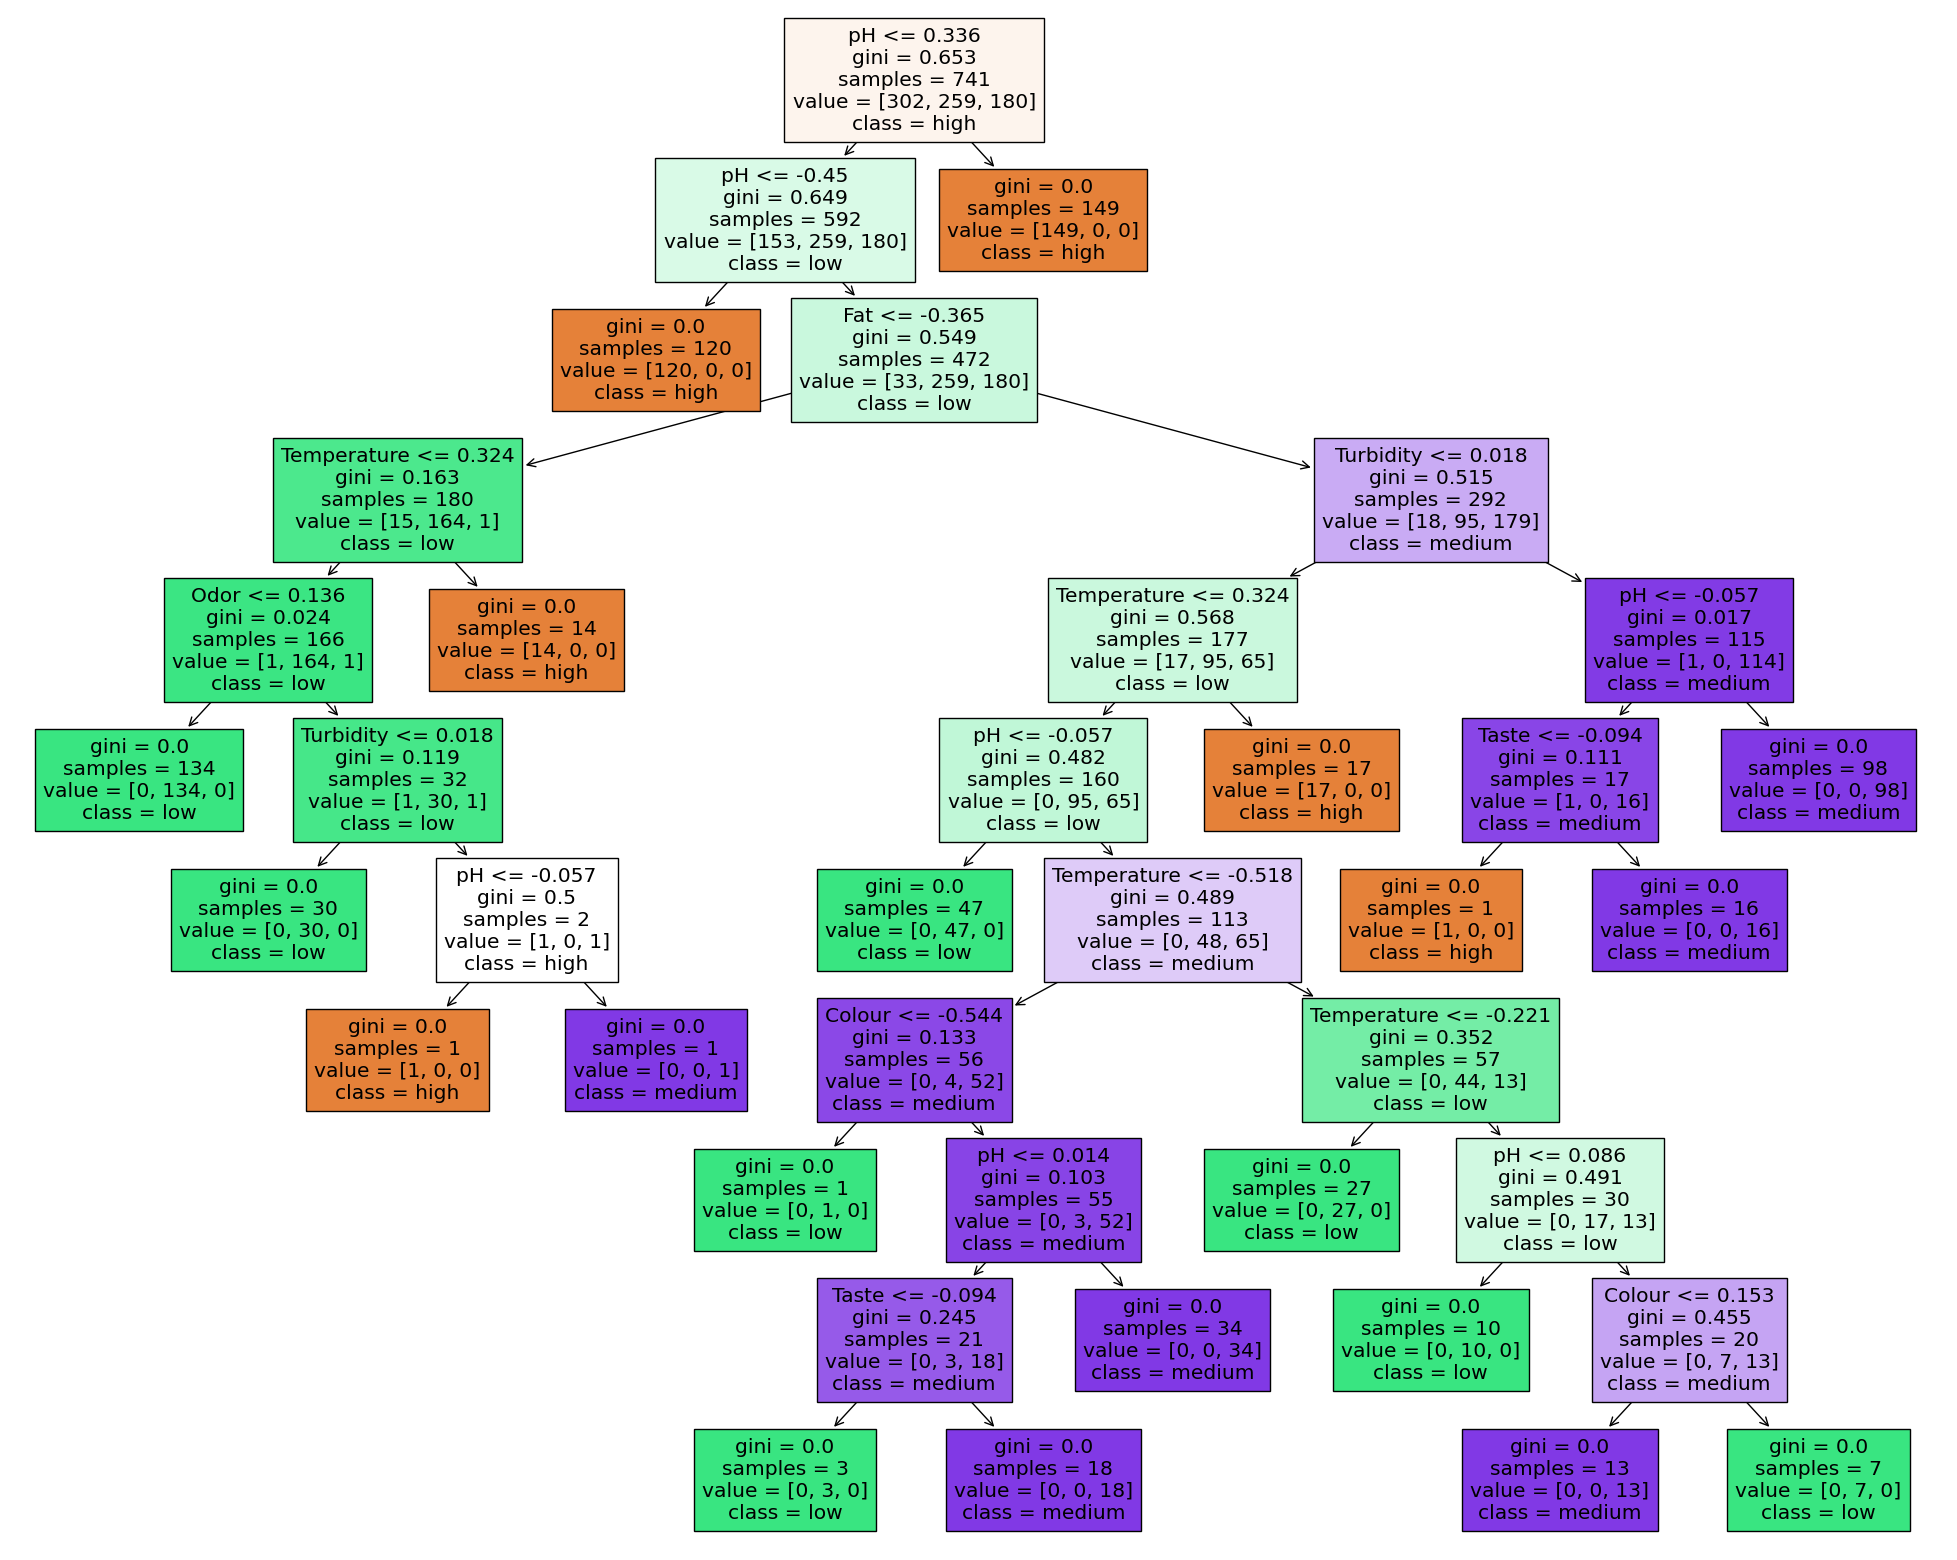

In [ ]:
feature_names = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']
label_names = ['high', 'low', 'medium']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,
                   feature_names=feature_names,
                   class_names=label_names,
                   filled=True)

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       0.98      1.00      0.99       115
           2       1.00      0.97      0.99        76

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9937106918238994


In [ ]:
classifier.score(X_train,y_train)

1.0

In [ ]:
classifier.score(X_test,y_test)

0.9937106918238994

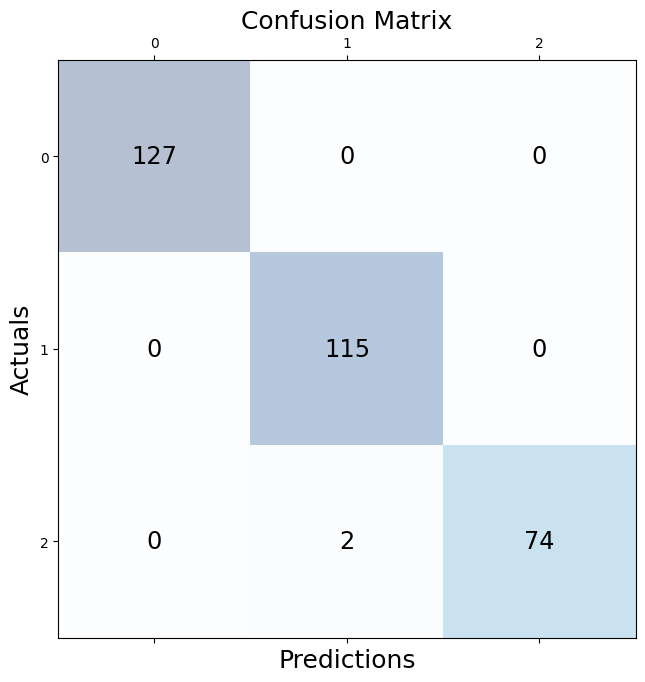

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()